In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('BBC.csv.txt')
data.head(20)

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,5,1,90000,2,0,5,1,0,2,2,50,1
1,5,1,60000,3,3,5,0,1,1,2,51,1
2,5,1,60000,3,3,5,1,1,5,2,51,1
3,5,2,70000,0,0,5,0,1,10,2,49,1
4,5,2,80000,5,5,5,1,4,2,2,48,1
5,5,1,70000,0,0,5,1,1,10,2,51,1
6,5,2,70000,0,0,5,1,1,10,2,51,1
7,5,1,60000,3,3,5,1,2,1,2,52,1
8,5,2,60000,4,4,5,1,3,20,2,52,1
9,5,1,70000,0,0,5,0,1,10,2,52,1


In [3]:
for column in data:
    print(column)

MaritalStatus
Gender
YearlyIncome
TotalChildren
NumberChildrenAtHome
EnglishEducation
HouseOwnerFlag
NumberCarsOwned
CommuteDistance
Region
Age
BikeBuyer


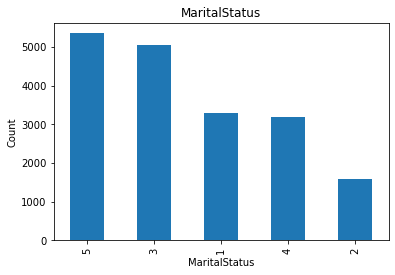

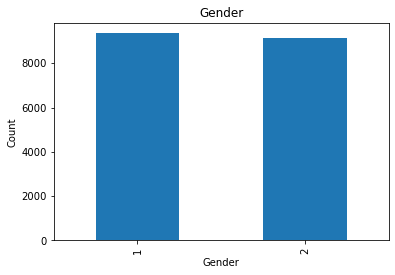

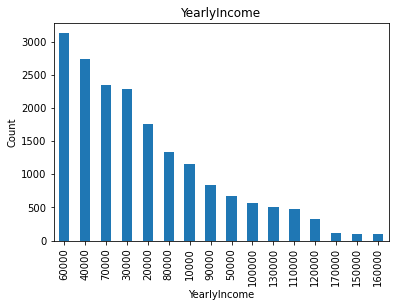

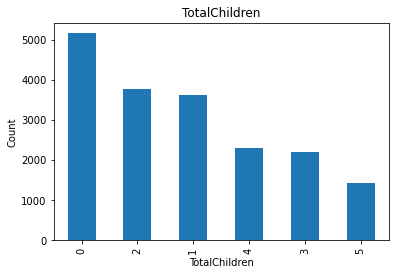

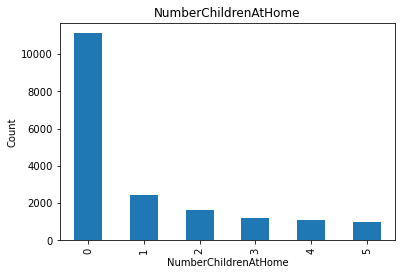

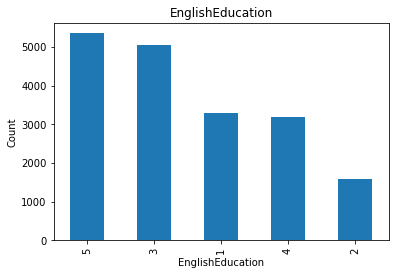

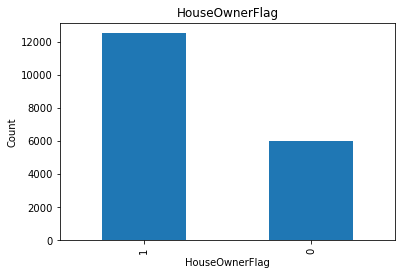

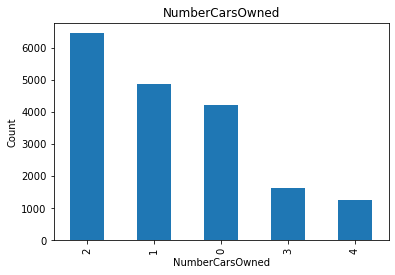

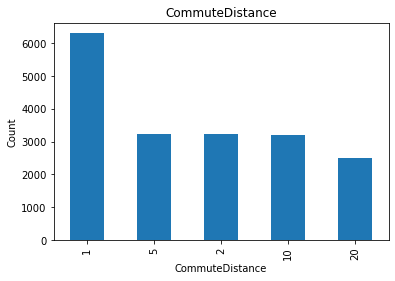

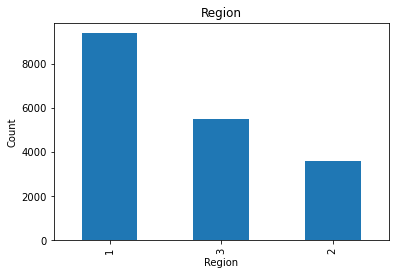

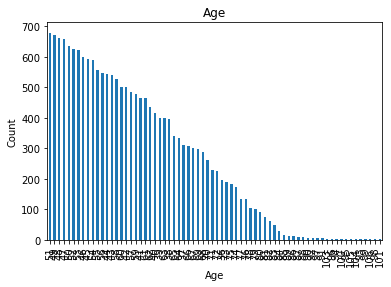

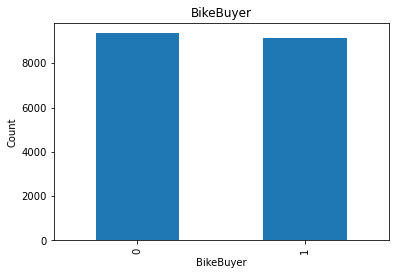

In [4]:
for feature in data:
    data[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    

In [5]:
x=data.drop('BikeBuyer',axis=1)
y=data['BikeBuyer']
print(x.shape)
print(y.shape)

(18484, 11)
(18484,)


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.50, random_state = 0)
print(xtrain.shape)
print(xtest.shape)

(9242, 11)
(9242, 11)


In [19]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
xtrain = mm.fit_transform(xtrain)
xtest = mm.fit_transform(xtest)

In [20]:
xtrain

array([[1.        , 0.        , 0.1875    , ..., 0.21052632, 0.        ,
        0.22857143],
       [0.        , 1.        , 0.0625    , ..., 0.        , 1.        ,
        0.2       ],
       [0.5       , 0.        , 0.0625    , ..., 0.21052632, 1.        ,
        0.18571429],
       ...,
       [1.        , 0.        , 0.125     , ..., 0.        , 1.        ,
        0.3       ],
       [0.5       , 0.        , 0.3125    , ..., 1.        , 0.        ,
        0.42857143],
       [0.75      , 1.        , 0.4375    , ..., 0.05263158, 0.        ,
        0.35714286]])

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(ypred)

[1 1 1 ... 1 1 0]


In [22]:
model.score(xtrain, ytrain)

0.6178316381735555

In [23]:
model.score(xtest, ytest)

0.6222679073793551